In [162]:
from graphviz import Digraph
from wand.image import Image as WImage

In [163]:
def VisualizeDAG(dag):
    vertices = [a for a,_,_ in dag]
    edges = list()
    for a,b,c in dag:
        fb = False
        fc = False
        for i in vertices:
            if b.issubset(i):
                edges.append((a,i,'l'))
                fb = True
        for i in vertices:
            if c.issubset(i):
                edges.append((a,i,'r'))
                fc = True
        if not fb:
            edges.append((a,b,'l'))
            vertices.append(b)
        if not fc:
            edges.append((a,c,'r'))
            vertices.append(c)


    diag = Digraph()
    diag.attr(rankdir='TD')

    for i in vertices:
        diag.node(name=str(i),label=str(i),shape='none')

    for a,b,c in edges:
        diag.edge(tail_name=str(a),head_name=str(b))

    diag.render('dag.gv',view=True)   


In [164]:
def assign(dag,node):
    a,b = (set(node[0]),set(node[2]))
    flag = False
    if len(dag) != 0:
        for i in dag:
            for j in i:
                if a.issubset(j):
                    j.difference_update(a)
                if b.issubset(j):
                    j.update(a)
                    flag = True
    if not flag:
        a.update(b)
        tup = (set(),a,set(),set())
        dag.append(tup)
    return dag

In [165]:
def binary(dag,node):
    tup = (set(node[3]),set(node[0]),set(node[2]),set(node[4]))
    if len(dag) != 0:
        for i in dag:
            if tup[0]==i[0] and tup[2].issubset(i[2]) and tup[3].issubset(i[3]):
                i[1].update(tup[1])
                return dag
    dag.append(tup)
    return dag

In [166]:
def unary(dag,node):
    tup = (set(node[2]),set(node[0]),set(node[3]),set())
    if len(dag) != 0:
        for i in dag:
            if tup[0]==i[0] and tup[2].issubset(i[2]):
                i[1].update(tup[1])
                return dag
    dag.append(tup)
    return dag

In [167]:
code = ["a=b*c","d=b","e=d*c","b=e","f=b+c","g=f+d"]
dag = []
for expr in code:
    node = list(expr)
    n = len(node)
    if n == 5:
        dag = binary(dag,node)
    elif n == 4:
        dag = unary(dag,node)
    elif n == 3:
        dag = assign(dag,node)
    else:
        print('ERROR')
        break
        
dag = [(a.union(b),c,d) for a,b,c,d in dag]
VisualizeDAG(dag)

In [173]:
for i in code:
    print(i)
print("\n\nDAG is in the file 'dag.pdf'")

a=b*c
d=b
e=d*c
b=e
f=b+c
g=f+d


DAG is in the file 'dag.pdf'


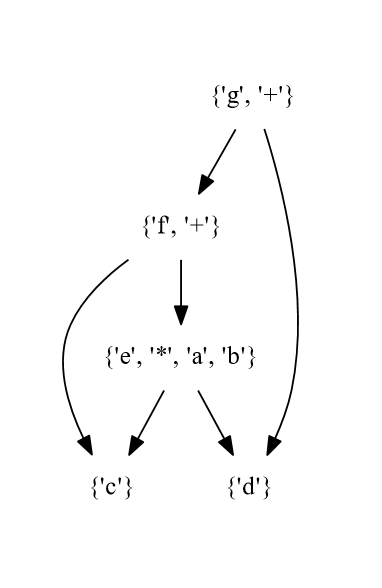